![example](images/director_shot.jpeg)

# IMDB Movie Data analysis

**Authors:** Sainath Vineeth Raju Putta
***

## Overview

This project analyzes the data sourced from Academy XI which is IMDB movies which gives information about movies from 2010 to 2018. Descriptive analysis of movie gross and ratings shows the money made domestic or internation. We can use this analysis to choose which studio are the best and make high rated movies.




## Business Problem

Top movies can be made with highest revenue using this data analysis by choosing are the movies supposed to be launched domestic or international, how does the movie rating effect the money made by movies and the best studios which make the movies. Based on this analysis, business in movies can be more productive.
***


## Data Understanding

IMDB movie data sets are been sourced by Academy XI to me where they are mutiple data sets and cointains unique keys to connect to each other with tconst id, year, title.
***


In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale
from locale import atof

%matplotlib inline

In [6]:
# Here you run your code to explore the data
#Loading DF 1 Title Basics
title_basics = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz',compression='gzip')
title_basics.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [5]:
title_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [8]:
#Loading DF 2 Movie Budgets
movie_gross = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz',compression='gzip')
movie_gross.head(3)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


In [7]:
movie_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [9]:
#Loading DF 3 Movie Ratings
ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz',compression='gzip')
ratings.head(3)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20


In [ ]:
ratings.describe()

## Data Preparation

The missing values cant be retrieved as the data has been sourced from Acadamey XI, either cant source it from internet as they are many sources and different data and need to be drop all the missing data.

***


In [10]:
# Here you run your code to clean the data
#Check duplicates for all 3 DF's
title_basics.duplicated().sum()

0

In [11]:
movie_gross.duplicated().sum()

0

In [12]:
ratings.duplicated().sum()

0

In [42]:
imdb1['year'].des

count    1255.000000
mean     2013.741833
std         2.628872
min      2010.000000
25%      2011.000000
50%      2014.000000
75%      2016.000000
max      2018.000000
Name: year, dtype: float64

In [13]:
#Checking and dropping null values in title_basics
title_basics.isnull().sum()
tt=title_basics.dropna()
tt.isnull().sum()

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [14]:
#Checking and dropping null values in movie_gross
movie_gross.isnull().sum()
mg=movie_gross.dropna()
mg.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [15]:
#Checking and dropping null values in ratings
ratings.isnull().sum()


tconst           0
averagerating    0
numvotes         0
dtype: int64

In [17]:
#merging movie_gross(mg) with Title_basics(tt) by changing the primary title to title
mg=mg.rename(columns={'title':'primary_title','year':'start_year'})
merg=pd.merge(tt,mg,on=['primary_title','start_year'])
merg.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross
0,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",IFC,744000.0,8000000
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",Fox,58200000.0,129900000
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",Uni.,26300000.0,26900000
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",Uni.,652300000.0,"1,019.4"
4,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",FD,13100000.0,10800000
5,tt0383010,The Three Stooges,The Three Stooges,2012,92.0,"Comedy,Family",Fox,44300000.0,10500000
6,tt0398286,Tangled,Tangled,2010,100.0,"Adventure,Animation,Comedy",BV,200800000.0,391000000
7,tt0401729,John Carter,John Carter,2012,132.0,"Action,Adventure,Sci-Fi",BV,73100000.0,211100000
8,tt0409847,Cowboys & Aliens,Cowboys & Aliens,2011,119.0,"Action,Sci-Fi,Thriller",Uni.,100200000.0,74600000
9,tt0427152,Dinner for Schmucks,Dinner for Schmucks,2010,114.0,Comedy,P/DW,73000000.0,13800000


In [18]:
#Merging merg and ratings
imdb=pd.merge(merg,ratings,on='tconst')
imdb.head(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,averagerating,numvotes
0,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",IFC,744000.0,8000000,6.1,37886
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",Fox,58200000.0,129900000,7.3,275300
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",Uni.,26300000.0,26900000,6.5,105116
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",Uni.,652300000.0,"1,019.4",7.0,539338
4,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",FD,13100000.0,10800000,6.2,94787


In [19]:
#Checking for null values and duplicates in imdb
imdb.isnull().sum()


tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
studio             0
domestic_gross     0
foreign_gross      0
averagerating      0
numvotes           0
dtype: int64

In [20]:
imdb.duplicated().sum()

0

In [21]:
#Dropping not required rows and changing column names
imdb.drop(['tconst','original_title'],axis=1,inplace=True)
i=imdb.rename(columns={'primary_title':'title','start_year':'year'})
i.head(5)

,title,year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,averagerating,numvotes
0,On the Road,2012,124.0,"Adventure,Drama,Romance",IFC,744000.0,8000000,6.1,37886
1,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",Fox,58200000.0,129900000,7.3,275300
2,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",Uni.,26300000.0,26900000,6.5,105116
3,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",Uni.,652300000.0,"1,019.4",7.0,539338
4,The Rum Diary,2011,119.0,"Comedy,Drama",FD,13100000.0,10800000,6.2,94787


In [22]:
#Checking the data types and changing them as required
i.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1255 entries, 0 to 1254
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1255 non-null   object 
 1   year             1255 non-null   int64  
 2   runtime_minutes  1255 non-null   float64
 3   genres           1255 non-null   object 
 4   studio           1255 non-null   object 
 5   domestic_gross   1255 non-null   float64
 6   foreign_gross    1255 non-null   object 
 7   averagerating    1255 non-null   float64
 8   numvotes         1255 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 98.0+ KB


In [23]:
i['foreign_gross']=i['foreign_gross'].str.replace(',','').astype(float)
print(i['foreign_gross'])

0         8000000.0
1       129900000.0
2        26900000.0
3            1019.4
4        10800000.0
           ...     
1250     35300000.0
1251     68700000.0
1252      1800000.0
1253     82100000.0
1254     16100000.0
Name: foreign_gross, Length: 1255, dtype: float64


In [24]:
i = i.astype({"domestic_gross":'int', "foreign_gross":'int'}) 
i.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1255 entries, 0 to 1254
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1255 non-null   object 
 1   year             1255 non-null   int64  
 2   runtime_minutes  1255 non-null   float64
 3   genres           1255 non-null   object 
 4   studio           1255 non-null   object 
 5   domestic_gross   1255 non-null   int64  
 6   foreign_gross    1255 non-null   int64  
 7   averagerating    1255 non-null   float64
 8   numvotes         1255 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 98.0+ KB


## Data Modeling
Its a huge amount of data and we can iterate various analysis based on this data but as I need to three recommandations, I have choosed to do analysis on profits mainly.

***

In [25]:
# Here you run your code to model the data
#Calculatating total_gross for every movies
i['total_gross']=i['domestic_gross']+i['foreign_gross']
i.head(5)

,title,year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,averagerating,numvotes,total_gross
0,On the Road,2012,124.0,"Adventure,Drama,Romance",IFC,744000,8000000,6.1,37886,8744000
1,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",Fox,58200000,129900000,7.3,275300,188100000
2,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",Uni.,26300000,26900000,6.5,105116,53200000
3,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",Uni.,652300000,1019,7.0,539338,652301019
4,The Rum Diary,2011,119.0,"Comedy,Drama",FD,13100000,10800000,6.2,94787,23900000


In [26]:
#Rearranging column names as required
imdb1 = i[['title','year','studio','domestic_gross','foreign_gross','total_gross','runtime_minutes','averagerating','numvotes','genres']]
imdb1.head(15)

,title,year,studio,domestic_gross,foreign_gross,total_gross,runtime_minutes,averagerating,numvotes,genres
0,On the Road,2012,IFC,744000,8000000,8744000,124.0,6.1,37886,"Adventure,Drama,Romance"
1,The Secret Life of Walter Mitty,2013,Fox,58200000,129900000,188100000,114.0,7.3,275300,"Adventure,Comedy,Drama"
2,A Walk Among the Tombstones,2014,Uni.,26300000,26900000,53200000,114.0,6.5,105116,"Action,Crime,Drama"
3,Jurassic World,2015,Uni.,652300000,1019,652301019,124.0,7.0,539338,"Action,Adventure,Sci-Fi"
4,The Rum Diary,2011,FD,13100000,10800000,23900000,119.0,6.2,94787,"Comedy,Drama"
5,The Three Stooges,2012,Fox,44300000,10500000,54800000,92.0,5.1,28570,"Comedy,Family"
6,Tangled,2010,BV,200800000,391000000,591800000,100.0,7.8,366366,"Adventure,Animation,Comedy"
7,John Carter,2012,BV,73100000,211100000,284200000,132.0,6.6,241792,"Action,Adventure,Sci-Fi"
8,Cowboys & Aliens,2011,Uni.,100200000,74600000,174800000,119.0,6.0,195889,"Action,Sci-Fi,Thriller"
9,Dinner for Schmucks,2010,P/DW,73000000,13800000,86800000,114.0,5.9,91546,Comedy


In [27]:
#Rearrange the data by title
lowest_gross=imdb1.nsmallest(n=5, columns=['total_gross'])
lowest_gross

,title,year,studio,domestic_gross,foreign_gross,total_gross,runtime_minutes,averagerating,numvotes,genres
442,GasLand,2010,WOW,30800,18600,49400,107.0,7.7,9940,Documentary
180,Inhale,2010,IFC,4100,51000,55100,83.0,6.6,6006,"Drama,Thriller"
252,As Good as Dead,2010,First,2000,53600,55600,100.0,5.2,1441,"Crime,Thriller"
492,Band Baaja Baaraat,2010,Yash,43800,60700,104500,139.0,7.2,13832,"Comedy,Drama,Romance"
161,Freakonomics,2010,Magn.,101000,16400,117400,93.0,6.4,6466,Documentary


## Evaluation
As we can see tho its the top movies or least movies, they make more profit internationally than domestic.

***

In [28]:
higest_gross=imdb1.nlargest(n=5, columns=['total_gross'])
higest_gross

,title,year,studio,domestic_gross,foreign_gross,total_gross,runtime_minutes,averagerating,numvotes,genres
825,Avengers: Age of Ultron,2015,BV,459000000,946400000,1405400000,141.0,7.3,665594,"Action,Adventure,Sci-Fi"
615,Black Panther,2018,BV,700100000,646900000,1347000000,134.0,7.3,516148,"Action,Adventure,Sci-Fi"
848,Star Wars: The Last Jedi,2017,BV,620200000,712400000,1332600000,152.0,7.1,462903,"Action,Adventure,Fantasy"
1119,Jurassic World: Fallen Kingdom,2018,Uni.,417700000,891800000,1309500000,128.0,6.2,219125,"Action,Adventure,Sci-Fi"
781,Frozen,2013,BV,400700000,875700000,1276400000,102.0,7.5,516998,"Adventure,Animation,Comedy"


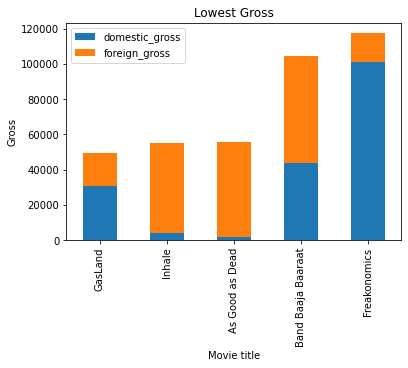

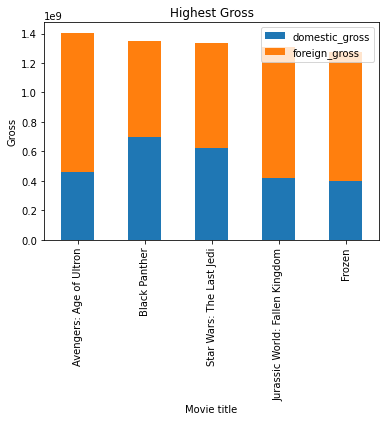

In [43]:
lowest_gross.plot(x="title", y=[ "domestic_gross", "foreign_gross"], kind="bar",stacked=True)

plt.title("Lowest Gross")
plt.xlabel("Movie title")
plt.ylabel("Gross")
plt.savefig("./images/lowest_gross.png", dpi=150)

higest_gross.plot(x="title", y=[ "domestic_gross", "foreign_gross"], kind="bar",stacked=True)
plt.title("Highest Gross")
plt.xlabel("Movie title")
plt.ylabel("Gross")
plt.savefig("./images/higest_gross.png", dpi=150)
plt.show()

In [30]:
def profit(profit):
    if profit>=1.837000e+08:
        return 'Excellent'
    elif profit>=6.990000e+07:
        return 'Good'
    else:
        return 'Average'

In [31]:
imdb1['sor']=imdb1['total_gross'].apply(profit)
imdb1.head()

<ipython-input-31-37b83dfacb31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb1['sor']=imdb1['total_gross'].apply(profit)


,title,year,studio,domestic_gross,foreign_gross,total_gross,runtime_minutes,averagerating,numvotes,genres,sor
0,On the Road,2012,IFC,744000,8000000,8744000,124.0,6.1,37886,"Adventure,Drama,Romance",Average
1,The Secret Life of Walter Mitty,2013,Fox,58200000,129900000,188100000,114.0,7.3,275300,"Adventure,Comedy,Drama",Excellent
2,A Walk Among the Tombstones,2014,Uni.,26300000,26900000,53200000,114.0,6.5,105116,"Action,Crime,Drama",Average
3,Jurassic World,2015,Uni.,652300000,1019,652301019,124.0,7.0,539338,"Action,Adventure,Sci-Fi",Excellent
4,The Rum Diary,2011,FD,13100000,10800000,23900000,119.0,6.2,94787,"Comedy,Drama",Average


In [ ]:
imdb1.describe()



#### Through this plot we can clearly say Rating does play a crucial role in making profits from movies.
***


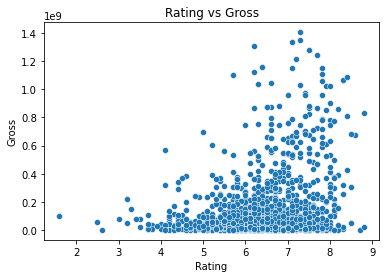

In [44]:
#Finding wheather rating places a role on the gross
g=sns.scatterplot(x='averagerating',y='total_gross',data=imdb1)
plt.title("Rating vs Gross")
plt.xlabel("Rating")
plt.ylabel("Gross")
plt.savefig("./images/Rating vs gross.png", dpi=150)
plt.show()



In [34]:
#Finding top 5 movies of the year based on the gross
top_rate_by_year = (imdb1.groupby(["year", "title","studio"]).mean()
                     .sort_values(["year", "total_gross"],ascending=False)
                     .groupby(level=0, as_index=False)
                     .apply(lambda x: x.head() if len(x) >= 5 else x.head(1))
                     .reset_index(level=0, drop=True)
                    ).round()

top_rate_by_year

domestic_gross  \
year title                                       studio                    
2010 Toy Story 3                                 BV          415000000.0   
     Inception                                   WB          292600000.0   
     Shrek Forever After                         P/DW        238700000.0   
     The Twilight Saga: Eclipse                  Sum.        300500000.0   
     Iron Man 2                                  Par.        312400000.0   
2011 Transformers: Dark of the Moon              P/DW        352400000.0   
     Pirates of the Caribbean: On Stranger Tides BV          241100000.0   
     Mission: Impossible - Ghost Protocol        Par.        209400000.0   
     Kung Fu Panda 2                             P/DW        165200000.0   
     Fast Five                                   Uni.        209800000.0   
2012 Skyfall                                     Sony        304400000.0   
     The Dark Knight Rises                       WB          448100000.0   
     The Hobbit: An Unexpected Journey           WB (NL)     303000000.0   
     Ice Age: Continental Drift                  Fox         161300000.0   
     The Amazing Spider-Man                      Sony        262000000.0   
2013 Frozen                                      BV          400700000.0   
     Iron Man 3                                  BV          409000000.0   
     Despicable Me 2                             Uni.        368100000.0   
     The Hobbit: The Desolation of Smaug         WB (NL)     258399999.0   
     The Hunger Games: Catching Fire             LGF         424700000.0   
2014 Transformers: Age of Extinction             Par.        245400000.0   
     The Hobbit: The Battle of the Five Armies   WB (NL)     255100000.0   
     Guardians of the Galaxy                     BV          333200000.0   
     Maleficent                                  BV          241400000.0   
     The Hunger Games: Mockingjay - Part 1       LGF         337100000.0   
2015 Avengers: Age of Ultron                     BV          459000000.0   
     Minions                                     Uni.        336000000.0   
     Spectre                                     Sony        200100000.0   
     Inside Out                                  BV          356500000.0   
     Mission: Impossible - Rogue Nation          Par.        195000000.0   
2016 Captain America: Civil War                  BV          408100000.0   
     Rogue One: A Star Wars Story                BV          532200000.0   
     Finding Dory                                BV          486300000.0   
     Zootopia                                    BV          341300000.0   
     The Secret Life of Pets                     Uni.        368400000.0   
2017 Star Wars: The Last Jedi                    BV          620200000.0   
     Despicable Me 3                             Uni.        264600000.0   
     Jumanji: Welcome to the Jungle              Sony        404500000.0   
     Spider-Man: Homecoming                      Sony        334200000.0   
     Wolf Warrior 2                              HC            2700000.0   
2018 Black Panther                               BV          700100000.0   
     Jurassic World: Fallen Kingdom              Uni.        417700000.0   
     Incredibles 2                               BV          608600000.0   
     Aquaman                                     WB          335100000.0   
     Bohemian Rhapsody                           Fox         216400000.0   

                                                          foreign_gross  \
year title                                       studio                   
2010 Toy Story 3                                 BV         652000000.0   
     Inception                                   WB         535700000.0   
     Shrek Forever After                         P/DW       513900000.0   
     The Twilight Saga: Eclipse                  Sum.       398000000.0   
     Iron Man 2                    

#### Trying to find which studio is best and makes the highest amount of profit overall.

In [38]:
studio_rating=imdb1.nlargest(10,'total_gross')[['studio','total_gross']].set_index('studio')
studio_rating

,total_gross
studio,
BV,1405400000
BV,1347000000
BV,1332600000
Uni.,1309500000
BV,1276400000
BV,1242800000
BV,1214800000
Uni.,1159400000
BV,1153300000


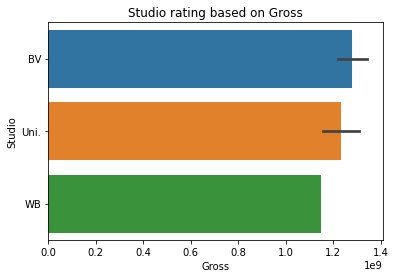

In [45]:
sns.barplot(x='total_gross',y=studio_rating.index,data=studio_rating)
plt.title("Studio rating based on Gross")
plt.xlabel("Gross")
plt.ylabel("Studio")
plt.savefig("./images/Studio Rating.png", dpi=150)
plt.show()

## Conclusions
This analysis leads to three recommendations for making profits in movie industry:




* High rated movies give the highest profits
* More international movies need to be made rather than domestic movies for higher returns
* Studio BV is the highest rated, so making movies with BV is highly profitable.
***